### Qiskit Coding Lecture 2nd, 2023 1학기 연세대학교 PHY5051-01 
- 
Date and time: 230504, 10am to 1pm KST
- 
[Lecture Syllabus](https://learn.qiskit.org/syllabus/IJN-K0N)

## 수업 중간중간 사용할 퀴즈 플랫폼 로그인

오늘도 마찬가지로 퀴즈쇼를 진행해 봅시다! 오늘은 총 15개의 문제가 준비되어 있습니다.

<h3>모두 로그인해주세요!</h3>

수업을 모두 마친후 최상위 5인에게는 종강전에 특별 상품을 보내드립니다! 기대하세요! (지난번 상품은 무엇이엇을까요?)

https://ahaslides.com/FXWV2

<img src="img/quiz.png" alt="Alternative text" width=800/>

## Quantum Fourier Transform - Quick Overview

[Qiskit Textbook Link](https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform)

양자 푸리에 변환의 일반적인 공식을 

N 큐비트 양자상태 $|X\rangle = \sum_{j=0}^{N-1}x_j |j\rangle$을 $|Y\rangle = \sum_{k=0}^{N-1}y_k |k\rangle$로 다음과 같이 변환하는 양자 푸리에 변환이 다음과 같이 정의될 때,

$$y_k = \frac{1}{\sqrt{N}}\sum_{j = 0}^{N-1}x_j e^{\frac{2 \pi i j k}{N}}$$

1큐비트와 3큐비트에 이 수식을 조금 살펴보고 다음 단계로 넘어가도록 합시다. 

### 1 큐비트

양자 푸리에 변환을 아주 간단하게 살펴보도록 합시다. 변환 대상이 되는 Computational basis를 $|0\rangle$과 $|1\rangle$로 제한하고, 대상이 되는 푸리에 Basis를 $|+\rangle$과 $|-\rangle$로 제한하는, 1 큐비트 경우를 살펴 봅시다.

$$N = 2^{1} = 2$$
$$QFT|x\rangle = \frac{1}{\sqrt{2}}\sum_{y = 0}^{2-1 = 1}e^{\frac{{2\pi ix y}}{2}} |y\rangle$$
$$= \frac{1}{\sqrt{2}}(e^{\frac{{2\pi ix \cdot 0}}{2}} |0\rangle + e^{\frac{{2\pi ix \cdot 1}}{2}}|1\rangle)$$
$$= \frac{1}{\sqrt{2}}(|0\rangle + e^{i \pi x}|1\rangle)$$

이 때, $QFT|0\rangle = |+\rangle, QFT|1\rangle = |-\rangle$는 다음과 같이 증명됩니다.
$$QFT|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + e^{0}|1\rangle) = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle$$
$$QFT|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + e^{\pi i}|1\rangle) = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle$$

이 결과를 염두에 두고 다음의 임의의 1 큐비트 상태를 생각해 봅시다.
$$|\psi \rangle = \alpha |0\rangle + \beta |1\rangle$$

이 상태를 양자 푸리에 변환을 했을때 푸리에 베이시스 ( $\alpha^\sim |+\rangle + \beta^\sim |-\rangle$) 의 amplitude  $\alpha^\sim$와 $\beta^\sim$를 계산해 봅시다.

$$\alpha^\sim = \frac{1}{\sqrt{2}}(\alpha + \beta)$$
$$\beta^\sim = \frac{1}{\sqrt{2}}(\alpha - \beta)$$

을 만족하며 이 결과는 Hadamard Gate
$$H = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

을 양자상태에 적용한 것과 같은 결과입니다. 이것이 우리가 하다마드 게이트가 $|0\rangle$과 $|1\rangle$을 $|+\rangle$와 $|-\rangle$로 변환한다고 표현하거나 단일 큐비트에 대해 양자 푸리에 변환을 실행한다고 말하는 이유입니다.



### 3큐비트

$$N = 2^{3} = 8$$
$$QFT|x\rangle = \frac{1}{\sqrt{2^3}}\sum_{y = 0}^{8-1 = 7}e^{\frac{{2\pi ix y}}{2^3}} |y\rangle$$

이 식의 Sum을 분리하기 전, 다음의 과정을 상기해 봅시다. $y$는 현재 2진수의 바이너리 형태 $[00000000] = [y_0y_1...y_{n-1}]$로 설정되어 있으며 이것을 감안하여 Tensor product형태로 정리하면 이 식은 Qiskit Textbook의 다음의 식과 같이 정리될 수 있습니다. 

$$QFT_3|X\rangle = \frac{1}{\sqrt{8}}\otimes_{k=1}^{3}(|0\rangle + e^{\frac{1}{2^{k-1}}\pi i \cdot x)}|1\rangle$$
$$\frac{1}{\sqrt{8}}[(|0\rangle + e^{\pi i x}|1\rangle)\otimes(|0\rangle + e^{\frac{1}{2}\pi i x}|1\rangle)\otimes(|0\rangle + e^{\frac{1}{4}\pi i x}|1\rangle)$$

다음은 Nielson and Chuang에 소개된 QFT 회로 입니다.

<img src='img/7QYUu.png' alt="Alternative text" width=800/>

위의 그림과 같이 QFT 회로를 구현함에 있어서 주의해야 하는 점은 입력 큐비트의 order와 출력 상태가 반전된다는 것입니다. 이것은 회로적으로 swap을 사용해서 구현할수도 있지만, 측정결과를 software적으로 invert시켜서 사용하거나, measurement를 적용할때 classical register와 qubit을 mapping하는 순서를 거꾸로 하여 구현할수도 있음을 의미합니다.


<div class="alert alert-block alert-info"> <b>Quiz Time</b> 양자 푸리에 연산에 대한 다음 퀴즈에 답하시오 (제한시간 30초)</div>

퀴즈를 마친 후 돌아와 3큐비트 양자 푸리에 변환을 Qiskit으로 구현해 봅시다.

### 3큐비트 QFT 구현

$|y_3y_2y_1\rangle = QFT|x_3x_2x_1\rangle$을 회로로 구현해 봅시다.


In [125]:
import numpy as np

from math import sqrt, pi

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map, plot_bloch_multivector, plot_state_qsphere
from qiskit.visualization.array import array_to_latex
from qiskit.quantum_info import hellinger_fidelity, random_statevector, Statevector, Operator,QuantumState


from qiskit_ibm_provider import IBMProvider

from qiskit_aer import AerSimulator, QasmSimulator, StatevectorSimulator


# Plotting tools
import matplotlib.pyplot as plt
from IPython.display import IFrame

In [127]:
qft = QuantumCircuit(3)

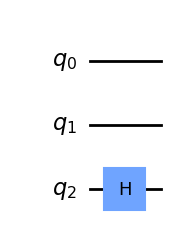

In [128]:
qft.h(2)
qft.draw('mpl')

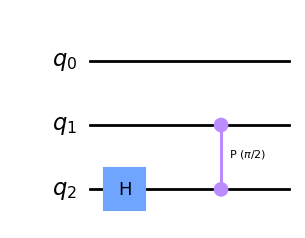

In [129]:
qft.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 0
qft.draw('mpl')

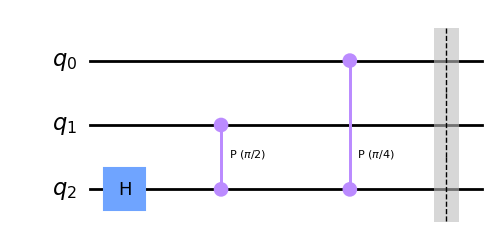

In [130]:
qft.cp(pi/4, 2, 0) # CROT from qubit 1 to qubit 0
qft.barrier()
qft.draw('mpl')

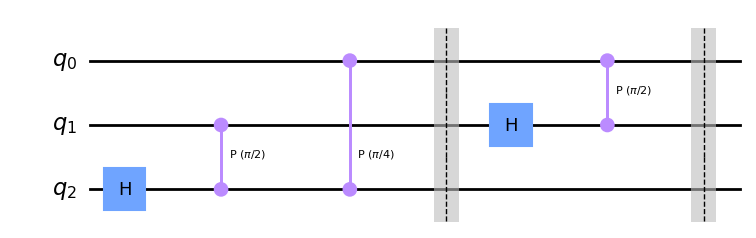

In [131]:
qft.h(1)
qft.cp(pi/2, 0, 1) # CROT from qubit 2 to qubit 1
qft.barrier()
qft.draw('mpl')

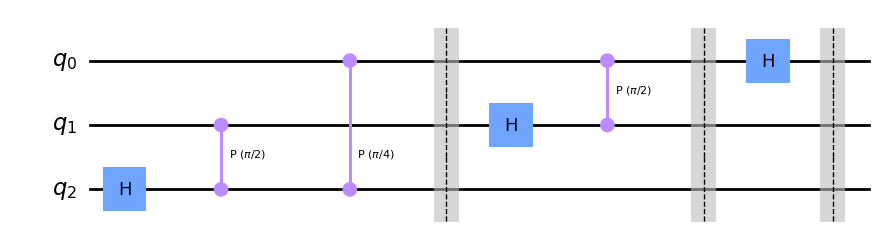

In [132]:
qft.h(0)
qft.barrier()
qft.draw('mpl')

In [133]:
qft.swap(0,2)

In [134]:
qft.draw()

░                ░ ┌───┐ ░    
q_0: ───────────────■────────░───────■────────░─┤ H ├─░──X─
                    │        ░ ┌───┐ │P(π/2)  ░ └───┘ ░  │ 
q_1: ──────■────────┼────────░─┤ H ├─■────────░───────░──┼─
     ┌───┐ │P(π/2)  │P(π/4)  ░ └───┘          ░       ░  │ 
q_2: ┤ H ├─■────────■────────░────────────────░───────░──X─
     └───┘                   ░                ░       ░

이제 임의의 값 `101`을 넣어 회로가 잘 동작하는지 확인해 봅시다.

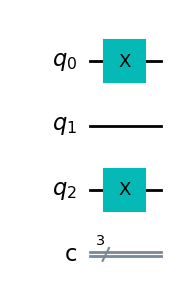

In [136]:
qc = QuantumCircuit(3,3)

# Encode the state 5
qc.x(0)

qc.x(2)
qc.draw('mpl')

In [137]:
array_to_latex(Statevector(qc))

<IPython.core.display.Latex object>

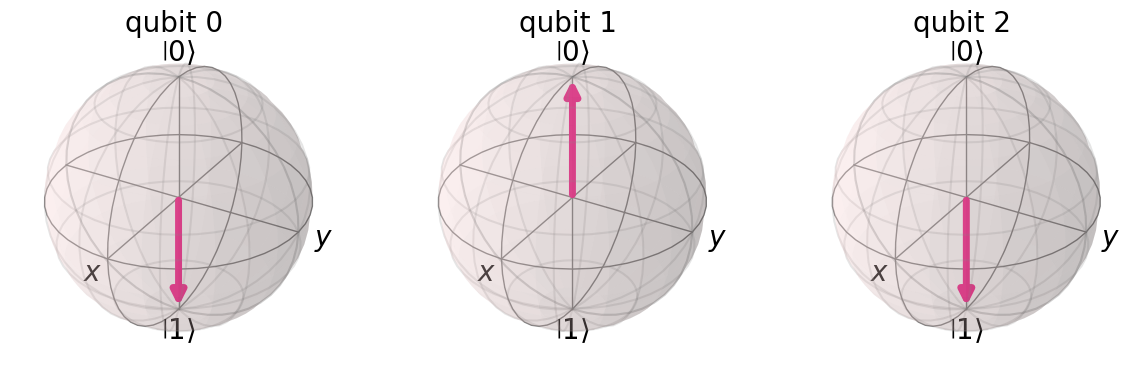

In [138]:
Statevector(qc).draw('bloch')

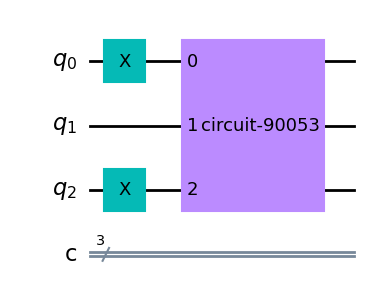

In [139]:
qc.append(qft, [0,1,2])
qc.draw('mpl')

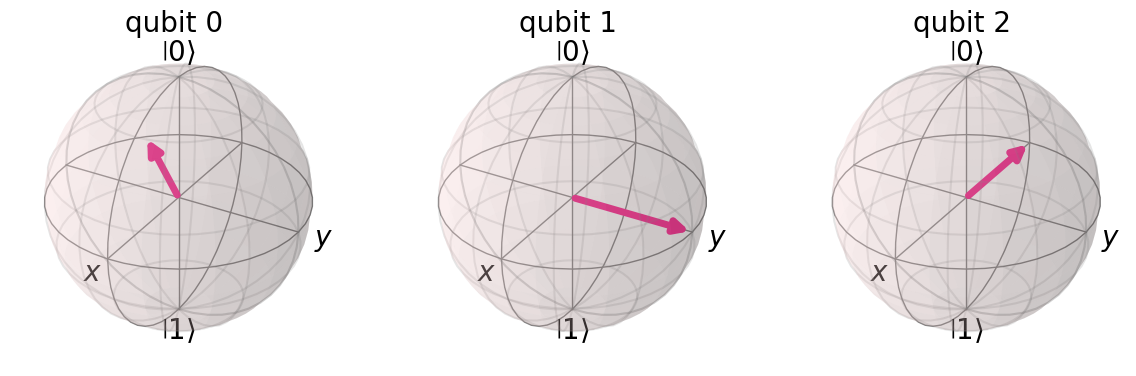

In [140]:
Statevector(qc).draw('bloch')

In [141]:
array_to_latex(Statevector(qc))

<IPython.core.display.Latex object>

In [142]:
Statevector(qc)

Statevector([ 3.53553391e-01+0.j        , -2.50000000e-01-0.25j      ,
              2.16489014e-17+0.35355339j,  2.50000000e-01-0.25j      ,
             -3.53553391e-01+0.j        ,  2.50000000e-01+0.25j      ,
             -2.16489014e-17-0.35355339j, -2.50000000e-01+0.25j      ],
            dims=(2, 2, 2))


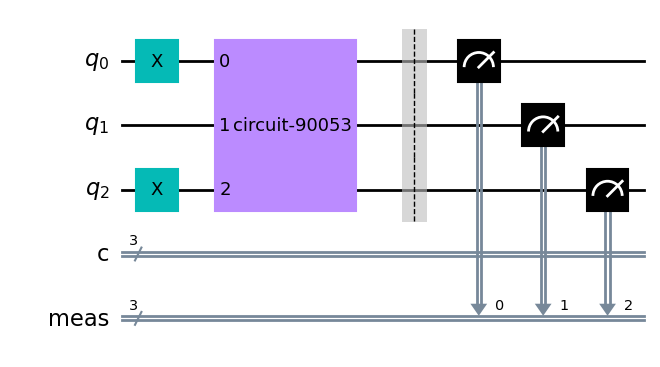

In [143]:
qc.measure_all()
qc.draw('mpl')

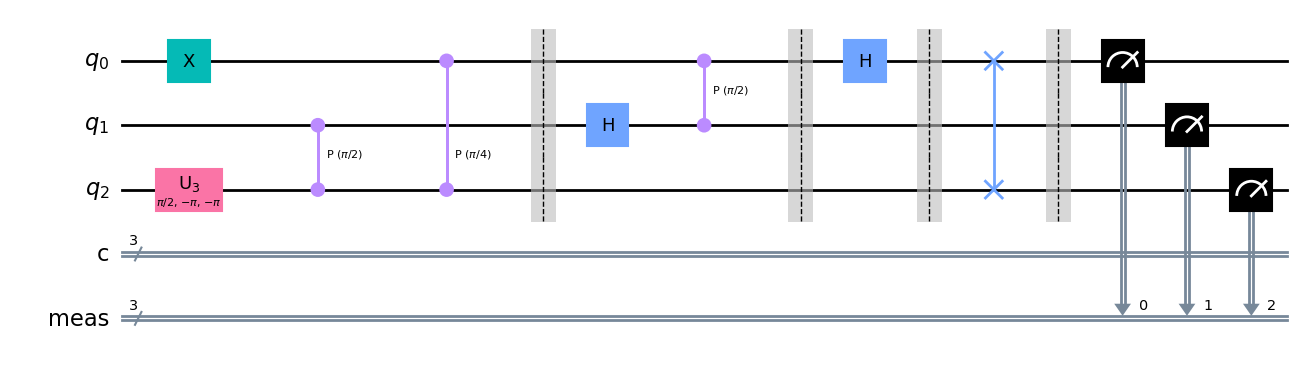

In [144]:
backend = AerSimulator()
qc_tr = transpile(qc, backend)
qc_tr.draw('mpl')

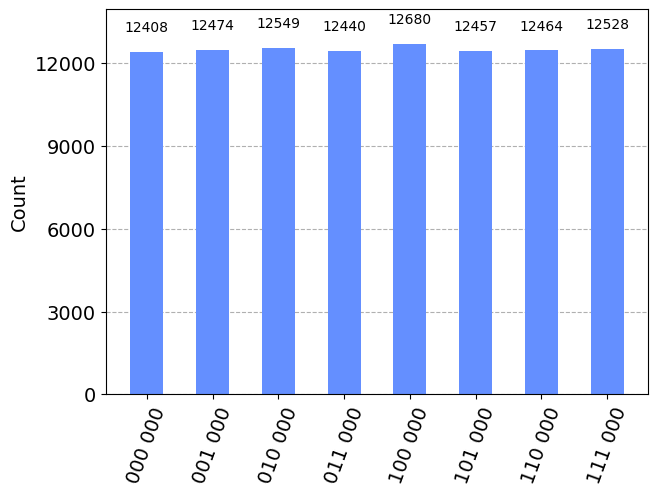

In [145]:
counts = backend.run(qc_tr, shots=100000).result().get_counts()
plot_histogram(counts)

이번엔, 만들어진 QFT 회로를 거꾸로 적용해서 결과를 확인해 봅시다.

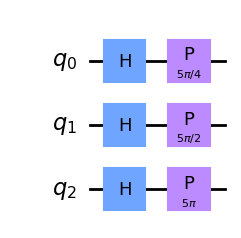

In [146]:
nqubits = 3
number = 5
qc = QuantumCircuit(3)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw('mpl')

In [147]:
array_to_latex(Statevector(qc))

<IPython.core.display.Latex object>

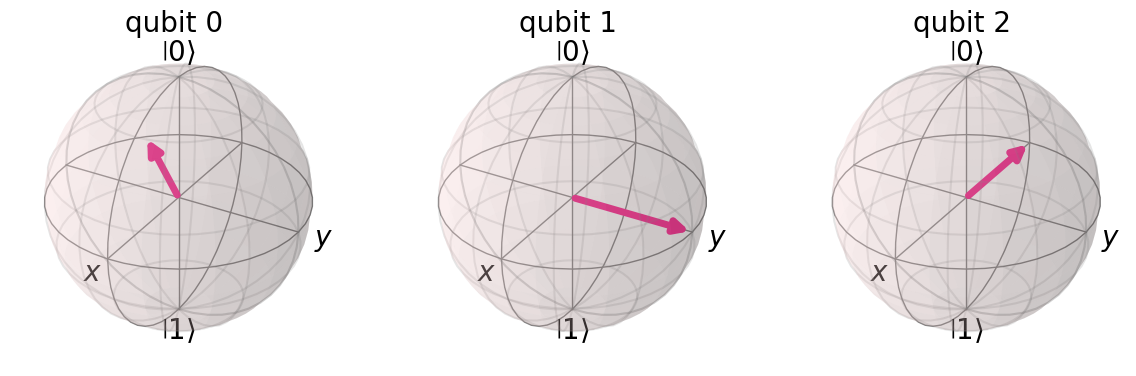

In [148]:
Statevector(qc).draw('bloch')

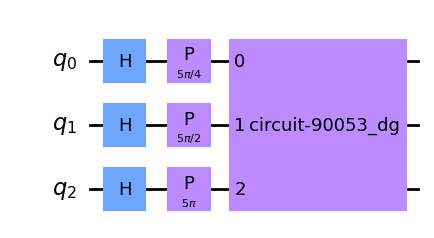

In [149]:
inv_qft = qft.inverse()
    # And add it to the first n qubits in our existing circuit
qc.append(inv_qft, [0,1,2])
qc.draw('mpl')

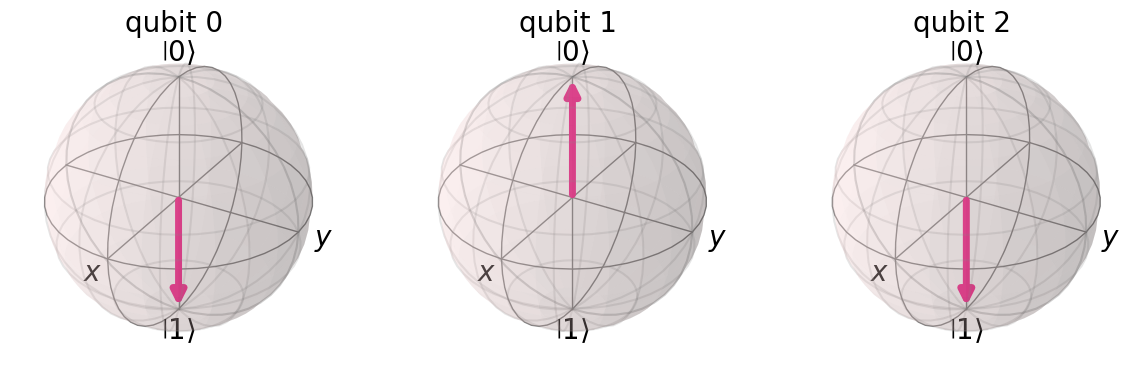

In [150]:
Statevector(qc).draw('bloch')

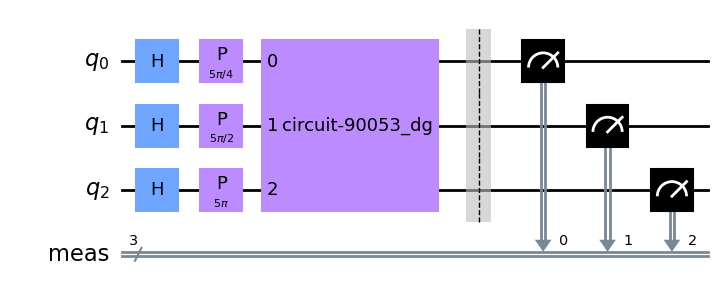

In [151]:
qc.measure_all()
qc.draw('mpl')

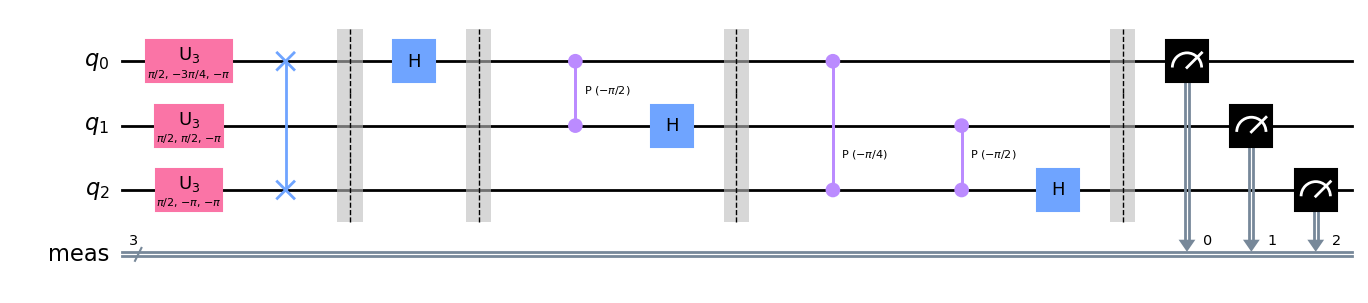

In [152]:
qc_tr = transpile(qc, backend)
qc_tr.draw('mpl')

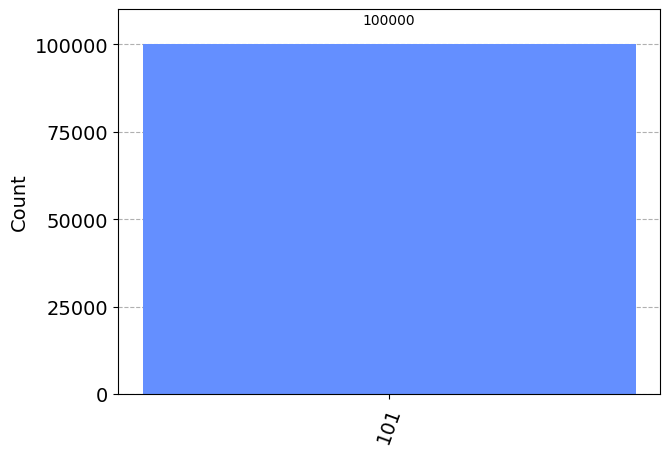

In [153]:
counts = backend.run(qc_tr, shots=100000).result().get_counts()
plot_histogram(counts)

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 위의 QFT회로에 '110'을 인코딩 한 후 QFT를 적용했을 때, statevector를 고르시오(제한시간 60초)</div>

## Quantum Phase Estimation - Quick Overview

(3월 Qiskit Meetup Recording: https://youtu.be/E2cZ5UKokC4) 

Quantum Phase Estimation은 임의의 양자 상태의 Phase를 얻어내는 유니터리 U를 만들어 내는 문제입니다. 동작은 다음과 같습니다.

$$U|\psi \rangle = e^{2 \pi i \theta} |\psi\rangle$$

양자 위상 추정 알고리즘은 위상 킥백을 사용하여 t 계수 레지스터 큐비트에 (푸리에 기저  기준으로)U의 위상을 기록합니다. 그런 다음 역 QFT를 사용하여 이를 푸리에 기저에서 계산 기저로 변환하여 측정할 수 있습니다.

즉 phase kickback을 사용해 U-gate를 사용하는 제어 연산을 사용하면, 큐비트의 위상은 $e^{2 \pi i \theta}$만큼 변하게됩니다. 적절한 CU게이트 들을 반복 사용해서 푸리에 베이시스에 $\theta$를 0부터 $2^t$사이의 값을 갖도록 인코드 한 후, 역 QFT를 적용해 계산 기저로 값을 얻어 냅니다.

<img src="https://learn.qiskit.org/content/v2/ch-algorithms/images/qpe_tex_qz.png" alt="Alternative text" width=800/>



### Example: T-gate 

T gate의 위상을 QPE 회로를 사용해 계산해 봅시다. T 게이트는 $|1\rangle$에 작용해 $e^{\pi/4}i$의 phase를 발생시킵니다. QPE회로의 원리가 $2\pi i \theta$를 반환하는 것이기 때문에, QPE를 통해서는 $1/8$을 얻게 될 것입니다.

3개의 큐비트를 사용하는 양자 회로를 auxilary 큐비트 1개를 추가해 생성합니다. 위상 측정에 사용할 큐비트는 1로 설정해 둡니다. 

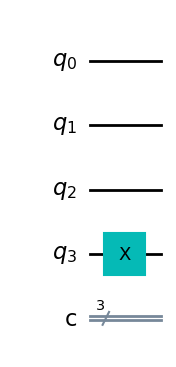

In [158]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw('mpl')

다음으로 위상을 셀 3개의 큐비트에 모두 하다마드 게이트를 적용합니다.

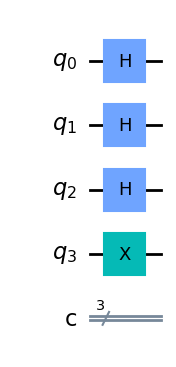

In [159]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw('mpl')

T 게이트를 각각 1회, 2회 4회 적용하는 방식으로 $\pi/4$, $\pi/2$, $\pi$를 각각 counting qubit에 인코딩 합니다.

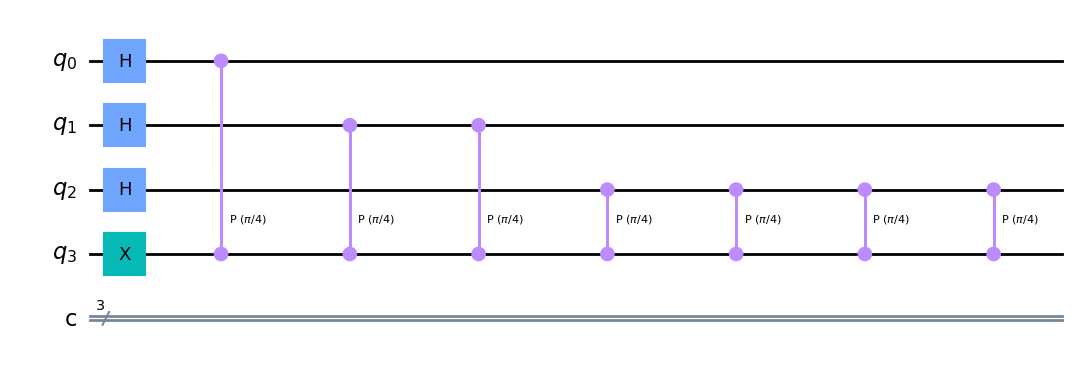

In [160]:

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2
qpe.draw('mpl')

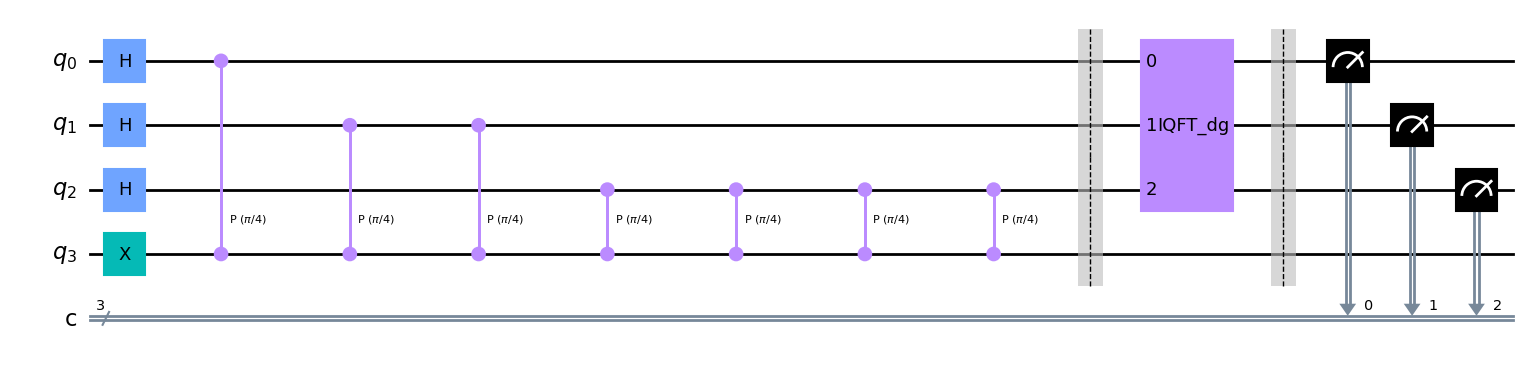

In [161]:
from qiskit.circuit.library import QFT

qpe.barrier()
# Apply inverse QFT
qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw('mpl')

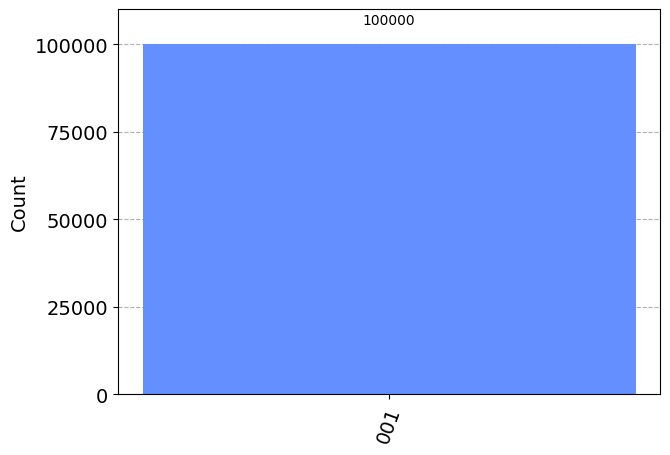

In [162]:
aer_sim = AerSimulator()
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=100000).result()
answer = results.get_counts()

plot_histogram(answer)

측정된 값은 1입니다. 이것은 사용한 큐비트의 숫자가 n일 때, $2^n\theta$에 해당하는 값이므로

$$\theta = 1/8$$

이 됩니다.

<div class="alert alert-block alert-info"> <b>Quiz Time</b> n = 5인 QPE 회로의 측정 값이 11010이라고 할 때, 측정된 phase값은 얼마 입니까?</div>

## Shor 알고리듬

### Period Finding
양의 정수이며 서로소인 $a$와 $N$으로 구성된
$$f(x) = a^x mod N$$

인 함수를 가정해 봅시다. 이 함수는 $a^x$를 N으로 나눈 나머지 값을 반환합니다. 어떤 숫자의 나머지의 값은 본인보다 작은 수를 갖게 되어 있으므로, 이 함수의 x에 여러가지 값을 넣어보면 이 함수는 주기를 갖는 다는 것을 알 수 있습니다.

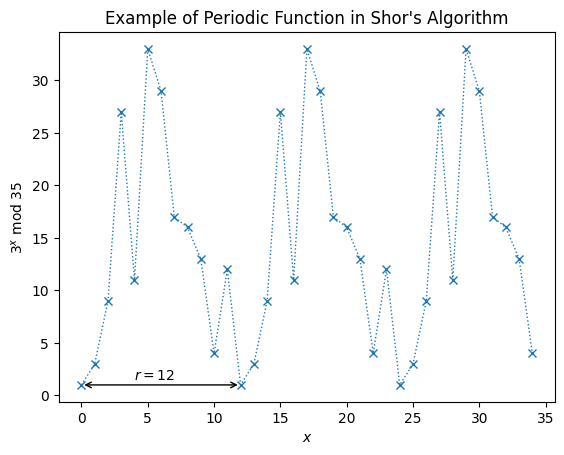

In [163]:
N = 35
a = 3

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

이때, $a^r mod N = 1$을 만족하는 가장 작은 숫자 r을 기억해 둡시다.

### The Solution

쇼어의 알고리듬은 유니터리 연산에 대한 양자 Phase Estimation이며 다음과 같이 정의됩니다.

$$U|y\rangle \equiv |ay \text{ } mod \text{ } N\rangle$$

이 유니터리를 1에 적용한다고 가정하고, a = 3, N=35라고 하면 결과는 다음과 같습니다
$$U|1\rangle = |3\rangle$$
$$U^2|1\rangle = |9\rangle$$
$$U^3|1\rangle = |27\rangle$$
$$...$$
$$U^{r-1}|1\rangle = |12\rangle$$
$$U^r|1\rangle = |1\rangle$$

그리고 이 모든 주기내의 상태들의 균일한 중첩상태는 U의 eigenstate가 됩니다. 그 증명은 다음과 같습니다.

$$|u_0\rangle = \frac{1}{\sqrt{12}}(|3\rangle + |9\rangle + .. + |1\rangle)$$
$$U|u_0\rangle = \frac{1}{\sqrt{12}}(U|3\rangle + U|9\rangle + .. + U|1\rangle)$$
$$= \frac{1}{\sqrt{12}}(U|9\rangle + U|27\rangle + .. + U|3\rangle)$$

더 흥미로운 또다른 eigenstate는 다음과 같이 정의됩니다.

$$|u_1\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}e^{-\frac{2 \pi i k}{r}}|a^k \text{ } mod \text{ } N \rangle$$

위와 같은 예제 (a=3, N=35)를 사용해서 확인해 봅시다

$$|u_1\rangle = \frac{1}{\sqrt{r}}(|1\rangle + e^{-\frac{2 \pi i}{12}}|3\rangle e^{-\frac{4 \pi i}{12}}|9\rangle + ... + e^{-\frac{22 \pi i}{12}}|12\rangle)$$
$$U|u_1\rangle = \frac{1}{\sqrt{r}}(|3\rangle + e^{-\frac{2 \pi i}{12}}|9\rangle e^{-\frac{4 \pi i}{12}}|27\rangle + ... + e^{-\frac{22 \pi i}{12}}|1\rangle)$$
$$\therefore U|u_1\rangle =  e^{-\frac{2 \pi i}{12}}|u_1\rangle$$

같은 방식으로 일반화 시켜서, 다음과 같이 이 유니터리의 eigenstate를 정의할 수 있습니다.

$$|u_s\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}e^{-\frac{2 \pi i s k}{r}}|a^k \text{ } mod \text{ } N \rangle$$
$$U|u_s\rangle =  e^{-\frac{2 \pi i s}{12}}|u_s\rangle$$

이 eigenstate들은 굉장히 재미있는 특징을 지니고있어서 모두 더하면 $|1\rangle$이 됩니다.

$$\frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}|u_s\rangle = |1\rangle$$

즉 계산 기저 $|1\rangle$이 이 eigenstate들의 중첩이기 때문에, 우리가 $|1\rangle$을 사용해 이 연산자에 QPE를 적용하면, 0부터 r-1 사이의 임의의 s값을 갖는 다음과 같은 phase가 측정됨을 의미합니다.

$$\phi = \frac{s}{r}$$

<img src="https://learn.qiskit.org/content/v2/ch-algorithms/images/shor_circuit_1.svg" alt="Alternative text" width=800/>


### 실습 a=7, N=15

$$U|y\rangle = |ay \text{ } mod \text{ } N\rangle$$

을 만족하는 유니터리를 다음과 같이 제공받습니다

In [164]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

8개의 counting qubit을 사용하는 것으로 하여, 상수들을 설정합니다.

In [165]:
# Specify variables
N_COUNT = 8  # number of counting qubits
a = 13

QFT 부분에서 배운 내용을 적용해서 inverse QFT 함수를 반환하는 회로를 만듭니다.


In [166]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

이 회로들을 가지고, 4비트의 입력에 작동하는 shor 회로를 만들어 봅시다.

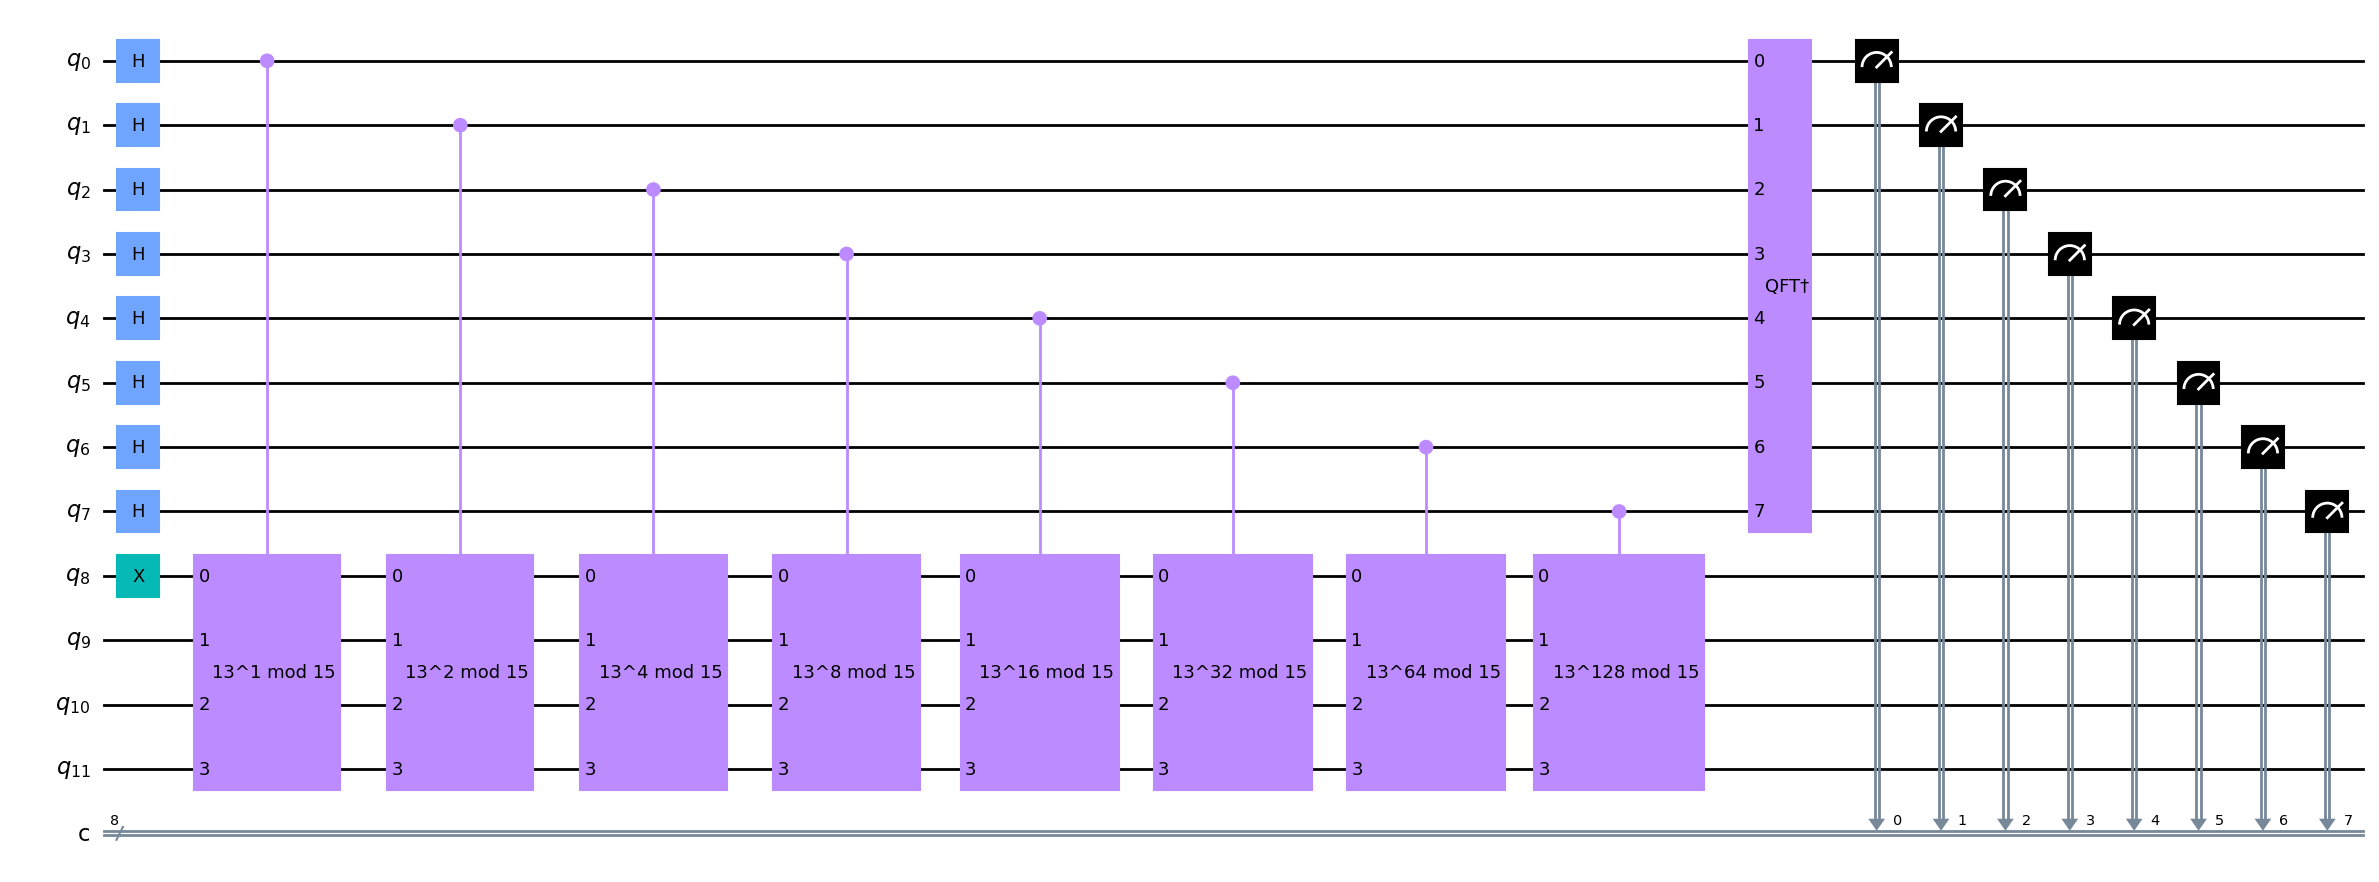

In [167]:
# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw('mpl', fold=-1)  # -1 means 'do not fold'

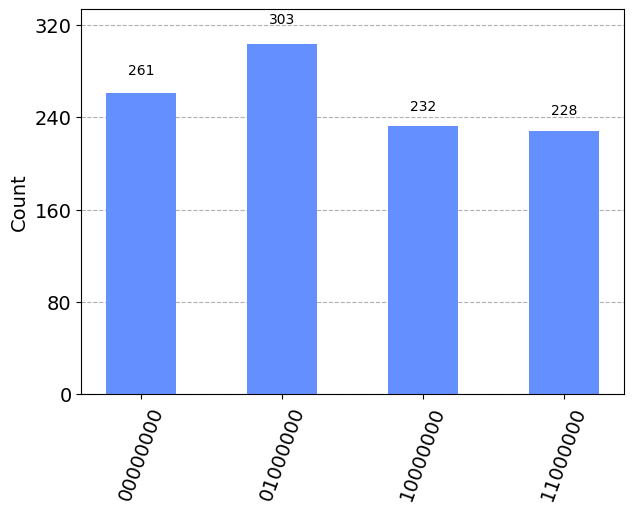

In [168]:
qc_tr = transpile(qc, backend)
counts = backend.run(qc_tr).result().get_counts()
plot_histogram(counts)

In [169]:
import pandas as pd

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  01000000(bin) =  64(dec)   64/256 = 0.25
2  11000000(bin) = 192(dec)  192/256 = 0.75
3  10000000(bin) = 128(dec)  128/256 = 0.50


각 위상의 s와 r을 알아내기 위해 python의 Fraction함수를 사용합니다. 나머지값은 15보다 작으므로 다음과 같은 옵션을 사용해서 위에서 계산된 phase에 각각 해당하는 s와 r값을 찾아봅시다.

In [170]:
from fractions import Fraction

rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.25      1/4            4
2   0.75      3/4            4
3   0.50      1/2            2


이 결과는 2, 3의 경우 올바른 r값을 반환하지 않습니다. 더욱 정밀한 결과를 위해서는 회로를 여러번 반복하거나, 적절한 초기 값을 설정하는 것이 중요합니다.

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 위의 회로에서 a=2, 8, 12, 13으로 각각 바꾸어 봅시다. 그중 회로에서 에러가 나는 값은 무엇일까요?</div>

### Modular Exponentiation

이 회로에서 U를 반복하면, 다음과 같은 특징을 갖는 새로운 유니터리가 만들어 집니다.

$$U^{2^j} = a^{2^j} y \text{ } mod \text{ }  N $$

이 유니터리를 사용하면, j값에따라 크기가 기하급수적으로 증가하기 때문에 더 빠르게 큰 숫자 영역을 탐색할 수 있습니다. 

### Factoring from Period Finding

이제 주기를 찾는 것을 활용해서 소인수 분해를 시작해 봅시다. 대상은 15로 설정해 봅시다.

### 1단계: 랜덤 넘버 발생

가장 먼저 1부터 N-1사이의 랜덤 정수를 발생시킵니다. 

In [119]:
from numpy.random import randint

N = 15
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, N)
print(a)

7


이 숫자가 15의 인수인지 두 숫자의 최대공약수를 먼저 확인해 봅시다.

In [102]:
from math import gcd # greatest common divisor
gcd(a, N)

1

다음으로, 쇼어의 알고리듬을 위해 a=7과 N=15에 대해 s/r을 계산해 봅시다. 이때 

$$a^r \text{ } mod \text{ } N = 1$$

이고 s는 1부터 r-1 사이의 임의의 값임을 기억합시다.

In [115]:
def qpe_amod15(a):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    display(qc.draw('mpl'))
    # Simulate Results
    aer_sim = AerSimulator()
    # `memory=True` tells the backend to save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=10000, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

계산된 phase에서 r을 다음과 같이 계산합니다.

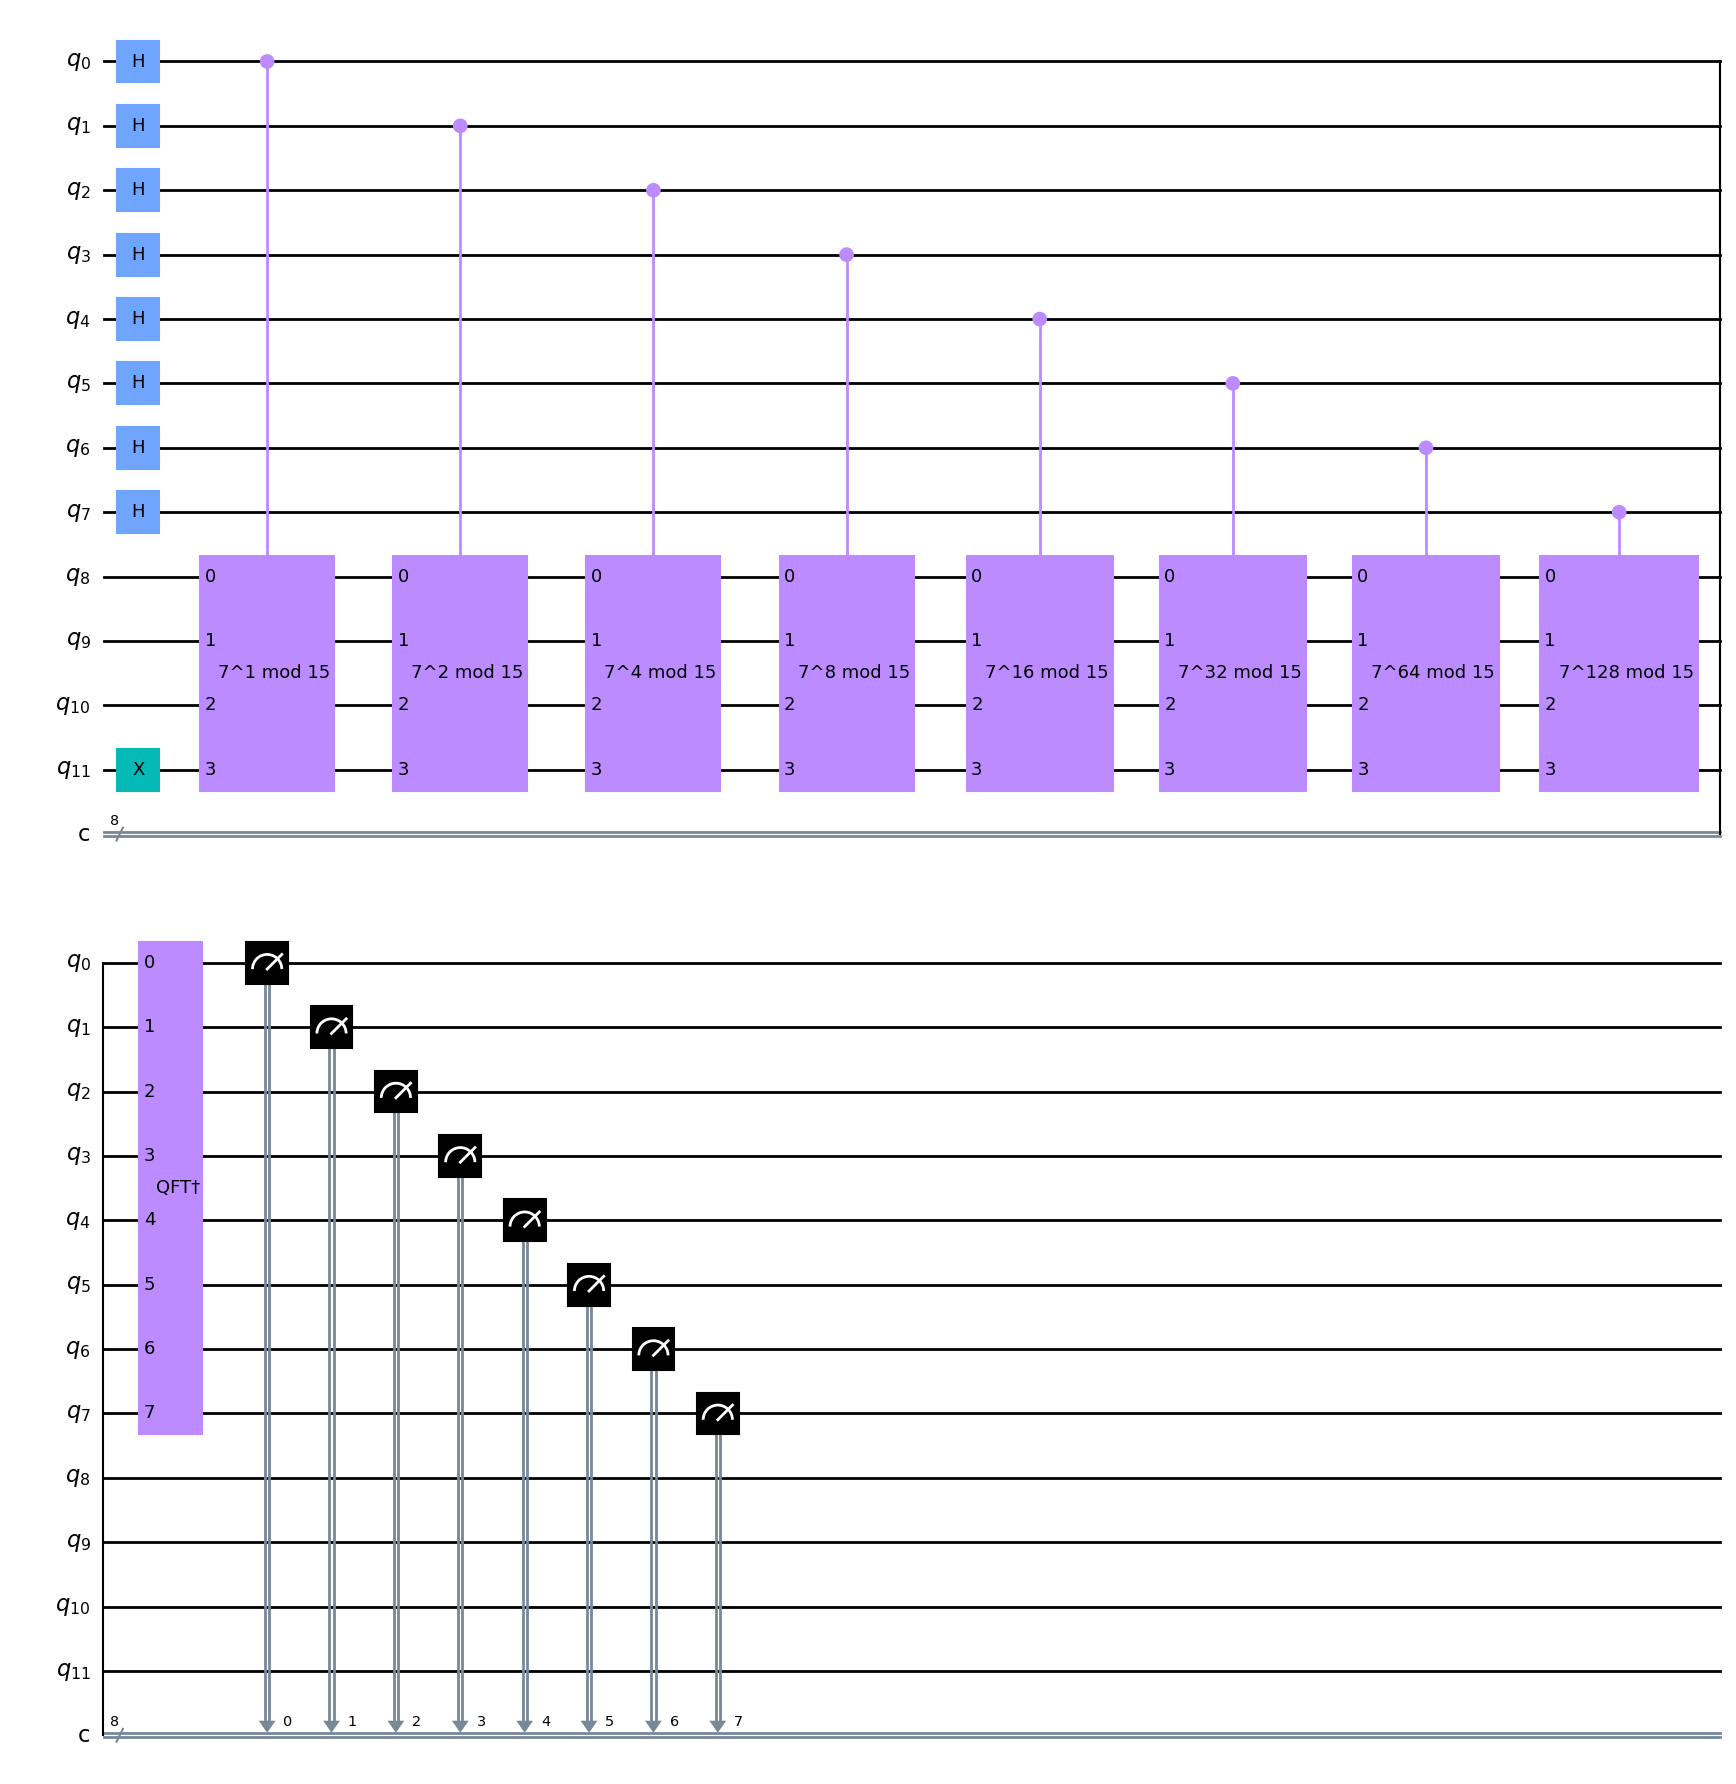

Register Reading: 11000000
Corresponding Phase: 0.75


Fraction(3, 4)

In [116]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15)

In [117]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


계산된 r값을 가지고 다음의 관계를 생각하여 소인수를 찾아 봅시다.

$$a^r \text{ } mod \text{ } N = 1$$

이기 때문에

$$a^r -1 \text{ } mod \text{ } N = 0$$

을 만족하게 될 것입니다. 즉 이때,

$$(a^{1/2} + 1)(a^{1/2} - 1) = N$$

로 소인수 분해 됨을 알 수 있습니다.


ATTEMPT 1:


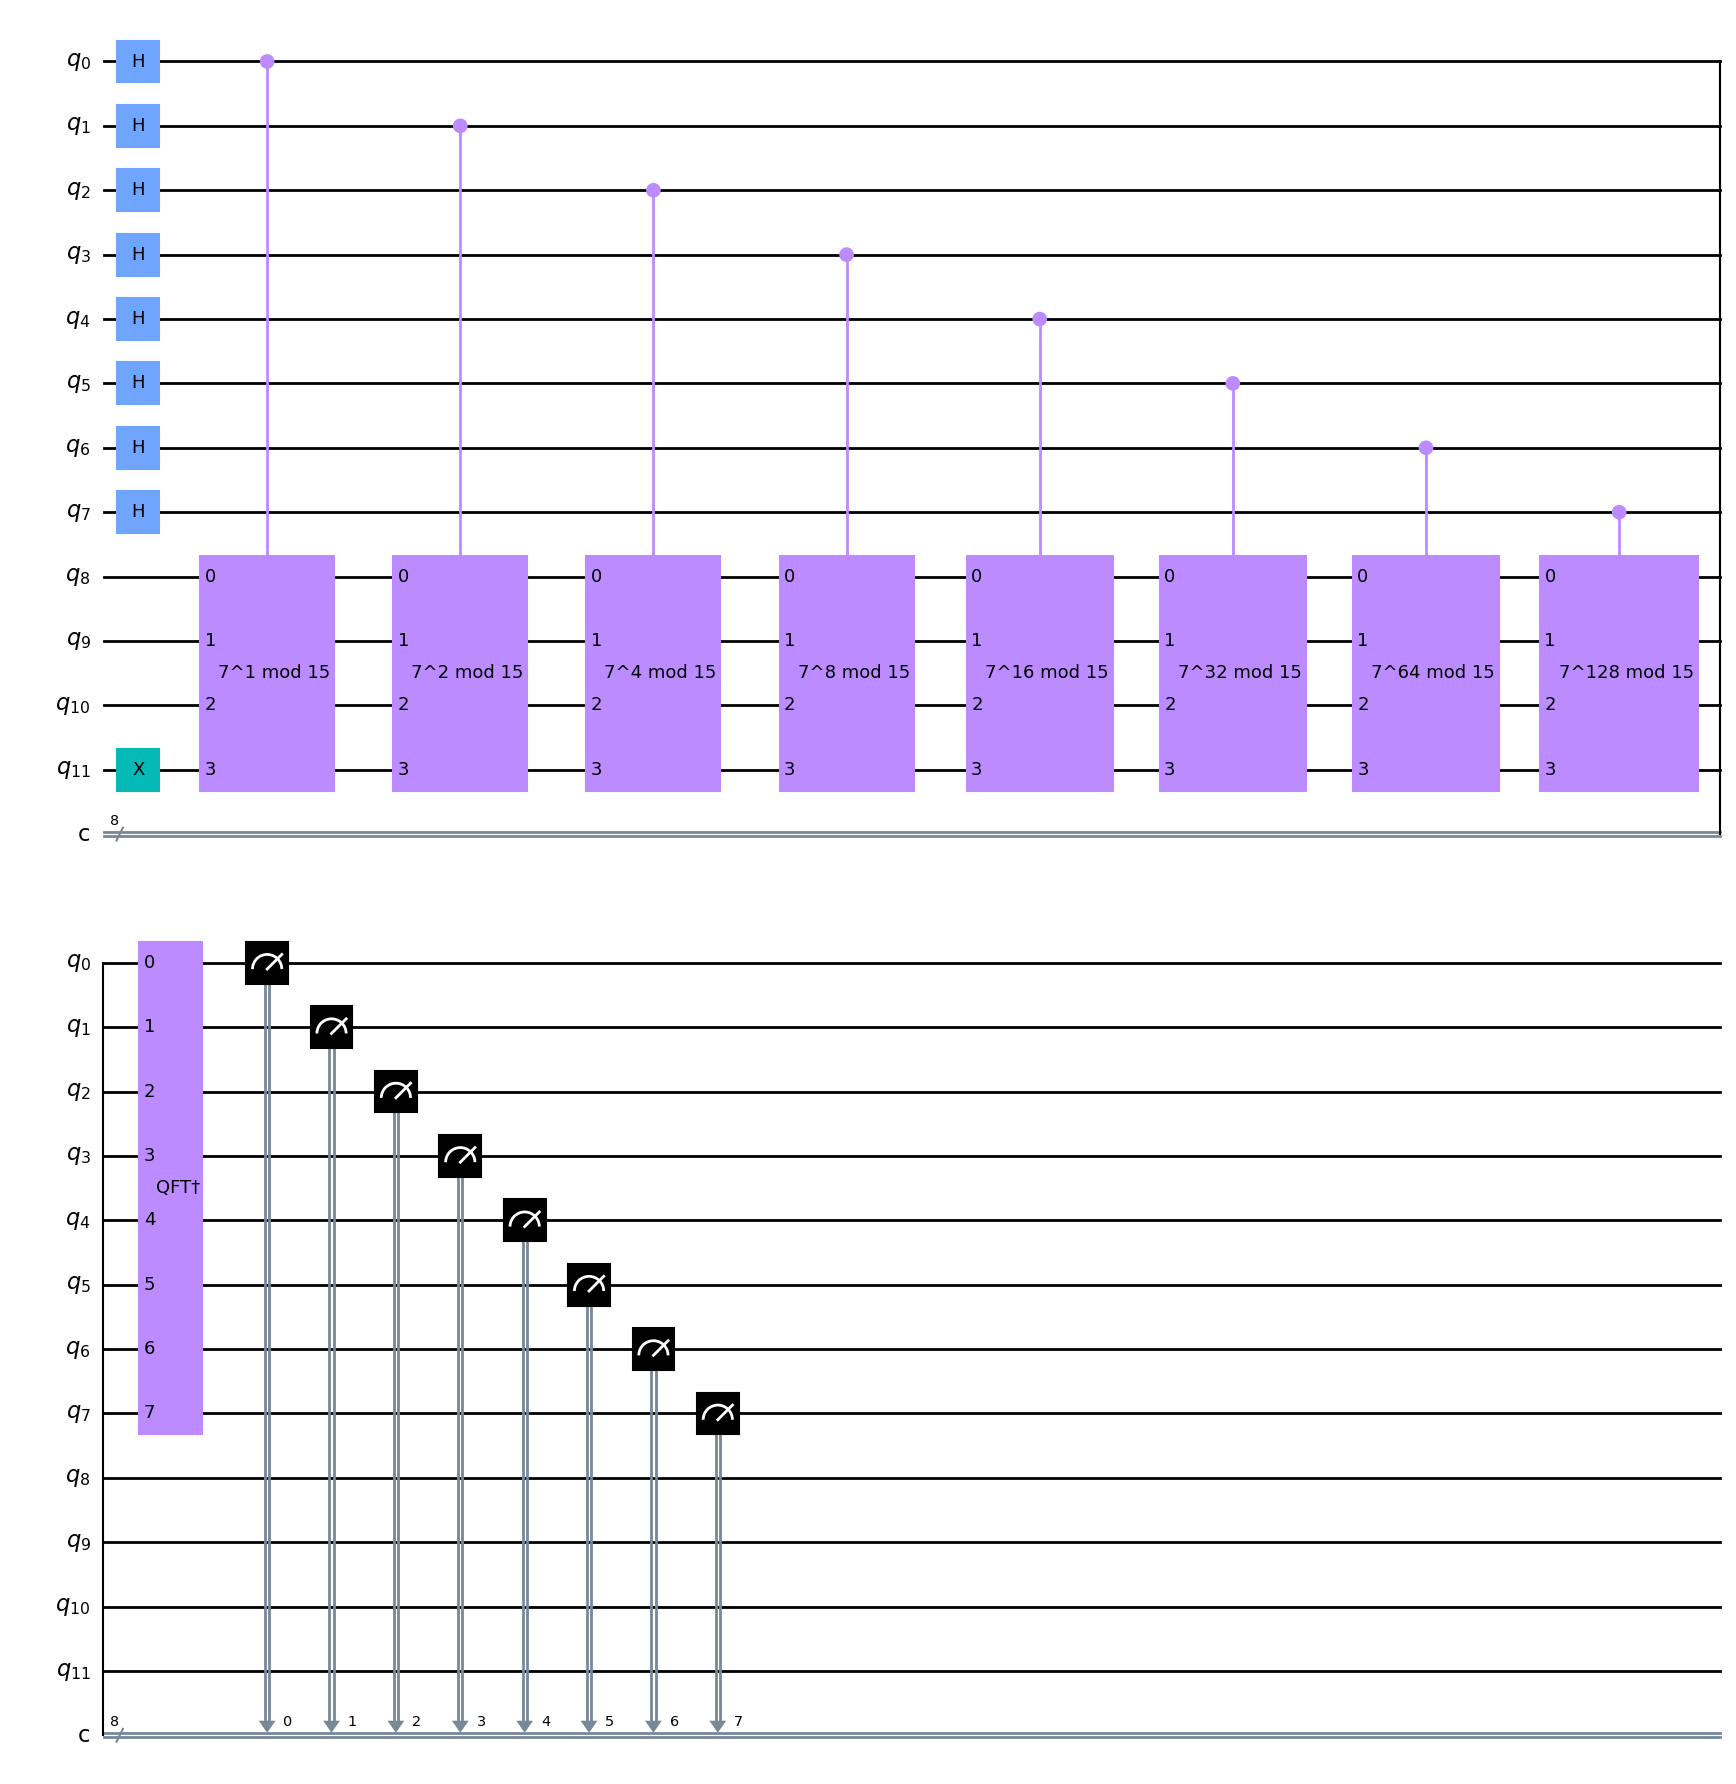

Register Reading: 01000000
Corresponding Phase: 0.25
Result: r = 4
Guessed Factors: 6 and 10
*** Non-trivial factor found: {guess} ***
*** Non-trivial factor found: {guess} ***


In [118]:
a = 7
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print("*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 위의 회로를 사용해서 12를 팩토링해봅시다. 이때 계산되는  r값을 퀴즈 플랫폼으로 가서 선택하세요</div>

백엔드 실행 부분을 수정하여 이 회로를 리얼 백엔드에서 실행해 봅시다.

In [120]:
#IBMProvider.save_account("Your_Token", overwrite=True)
#provider = IBMProvider()

#수업을 위해 추가된 허브와 그룹, 프로젝트를 프로바이더에 설정
provider = IBMProvider(instance="ibm-q-yonsei/internal/qc-and-simulatio")

In [121]:
from qiskit_ibm_provider import least_busy

backend = least_busy(provider.backends())
backend

<IBMBackend('ibm_auckland')>

In [123]:
def qpe_amod15(a):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    display(qc.draw('mpl'))
    # Simulate Results
    qc_tr = transpile(qc, backend)
    # `memory=True` tells the backend to save each measurement in a list
    job = backend.run(qc_tr, shots=100000, memory=True)
    print(job.job_id())
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase


ATTEMPT 1:


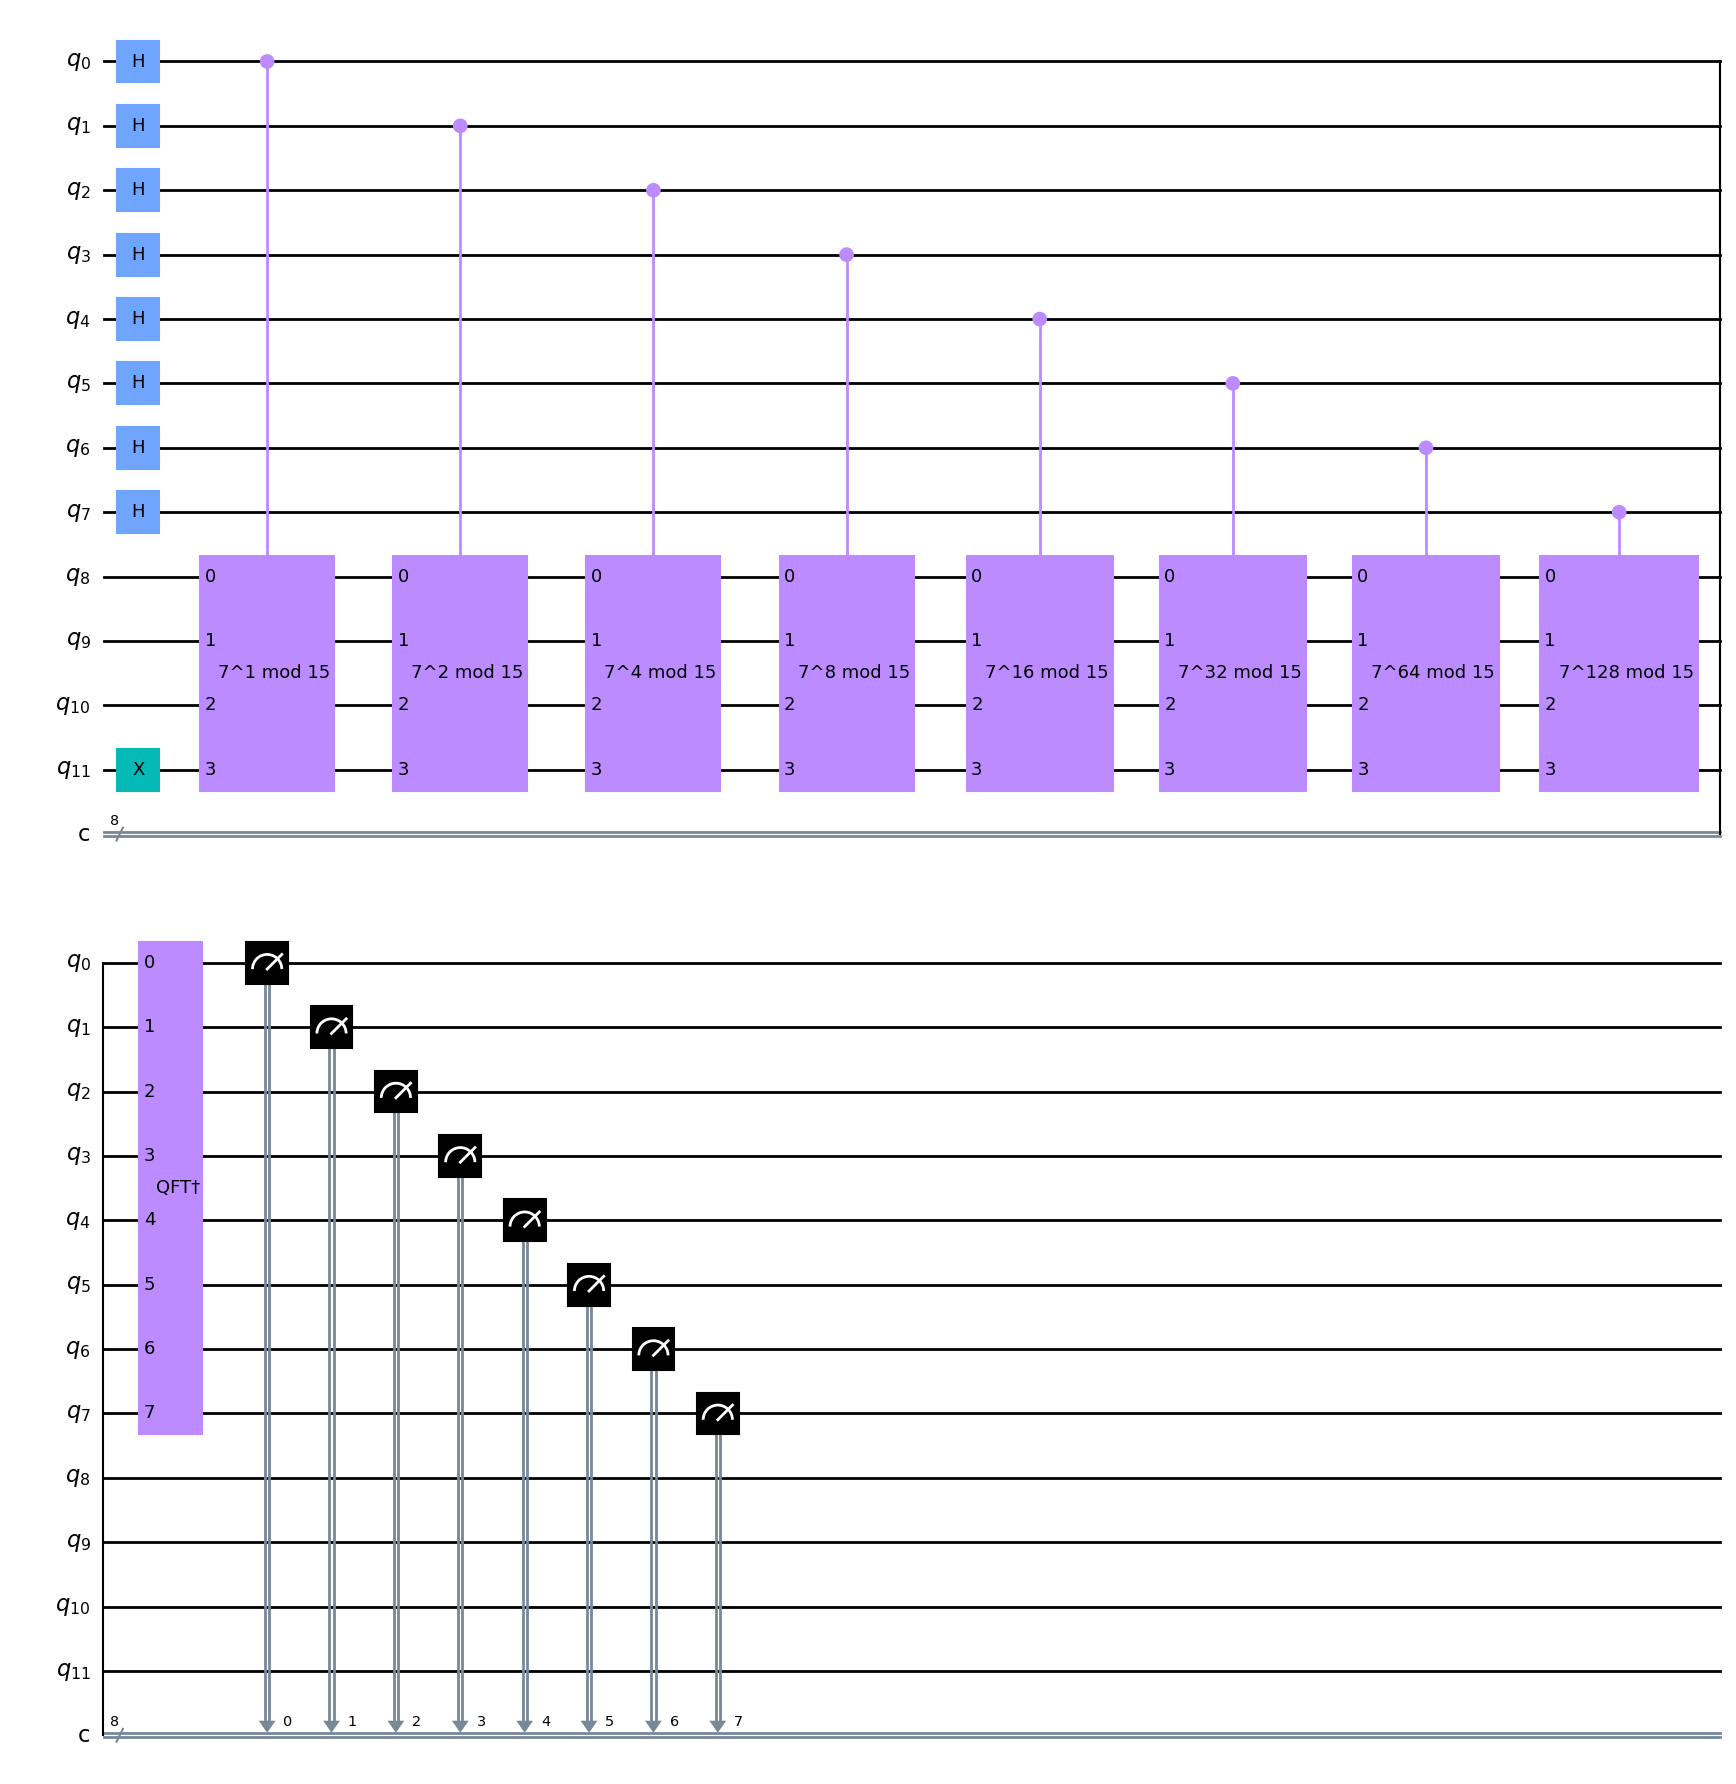

ch9fm0e682kp7tmqa5eg


IBMJobFailureError: "Job failed: 500, message='Internal Server Error', url=URL('http://127.0.0.1:8080/backend/job')"

In [124]:
a = 7
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print("*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True